# Projeto 9 - Vizualização de dados com Python

# Campeonato de Futebol Brasileiro 

## Importando Bibliotecas e Dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [7]:
sns.set(style="whitegrid", palette="deep")

In [2]:
df = pd.read_csv('Tabela_Clubes.csv')

## Gráficos

## 1. Análises Gerais (Distribuição e Resumo)

| Objetivo                                   | Colunas       | Tipo de Gráfico             | Sugestão                                                 |
| ------------------------------------------ | ------------- | --------------------------- | -------------------------------------------------------- |
| Distribuição de vitórias                   | `Vitorias`    | Histograma (`sns.histplot`) | Ver quantas vitórias os times costumam ter               |
| Distribuição de derrotas                   | `Derrotas`    | Histograma                  | Ver se a distribuição é simétrica em relação às vitórias |
| Distribuição da idade média                | `Idade_Media` | Histograma ou boxplot       | Analisar a idade média dos elencos                       |
| Distribuição de valores de mercado         | `Valor_total` | Histograma ou boxplot       | Ver se há grande disparidade entre clubes                |



### Distribuição de vitórias



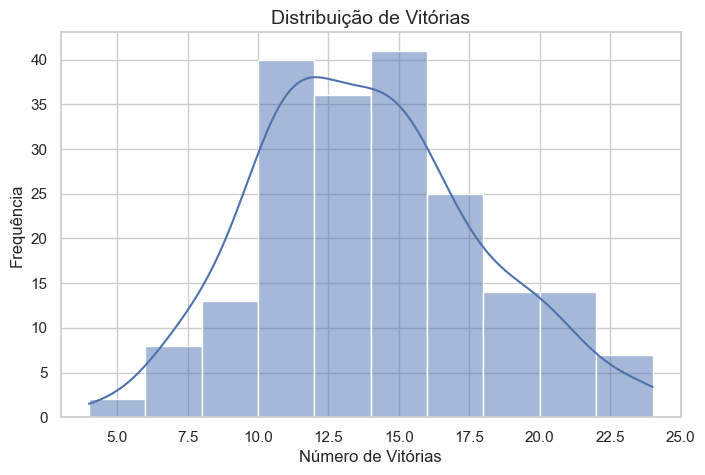

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Vitorias"], bins=10, kde=True)
plt.title("Distribuição de Vitórias", fontsize=14)
plt.xlabel("Número de Vitórias")
plt.ylabel("Frequência")
plt.show()

### Distribuição de derrotas

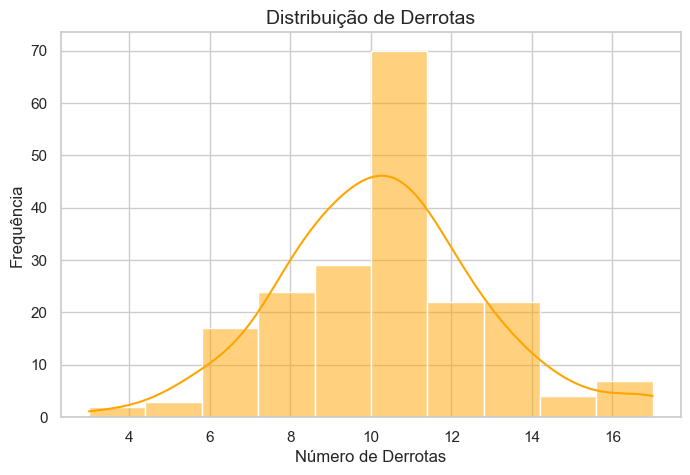

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Derrotas"], bins=10, kde=True, color="orange")
plt.title("Distribuição de Derrotas", fontsize=14)
plt.xlabel("Número de Derrotas")
plt.ylabel("Frequência")
plt.show()

### Distribuição da idade média 

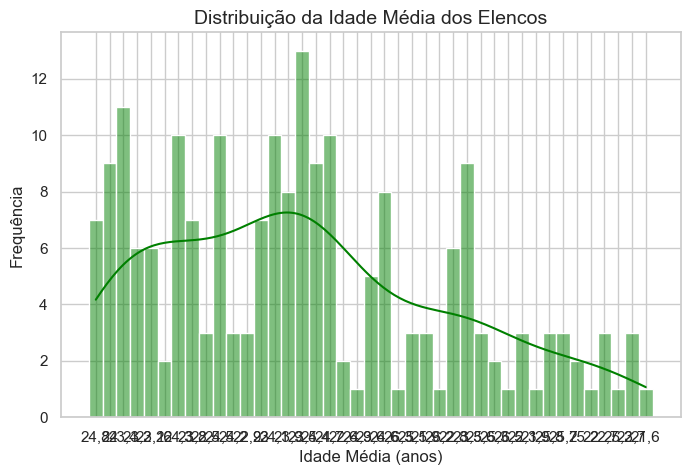

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Idade_Media"], bins=10, kde=True, color="green")
plt.title("Distribuição da Idade Média dos Elencos", fontsize=14)
plt.xlabel("Idade Média (anos)")
plt.ylabel("Frequência")
plt.show()

### Distribuição de valores de mercado

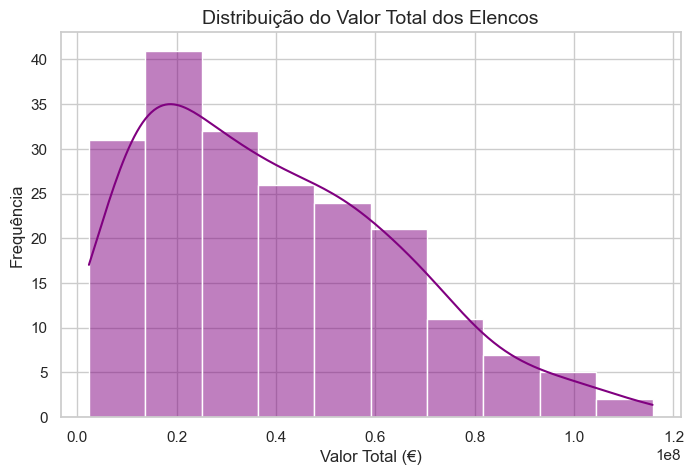

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Valor_total"], bins=10, kde=True, color="purple")
plt.title("Distribuição do Valor Total dos Elencos", fontsize=14)
plt.xlabel("Valor Total (€)")
plt.ylabel("Frequência")
plt.show()

## 2. Comparações Entre Clubes

| Objetivo                                  | Colunas                     | Tipo de Gráfico              | Sugestão                                     |
| ----------------------------------------- | --------------------------- | ---------------------------- | -------------------------------------------- |
| Top 10 clubes com mais vitórias em um ano | `Ano`, `Clubes`, `Vitorias` | Gráfico de barras            | Usar `sns.barplot` com ordenação decrescente |
| Clubes com melhor saldo de gols           | `Saldo`                     | Gráfico de barras horizontal | Facilita a leitura dos nomes dos clubes      |
| Clubes com maior valor de elenco          | `Valor_total`               | Barras ou barras horizontais | Mostrar a diferença financeira entre times   |
| Clubes com mais estrangeiros              | `Estrangeiros`              | Barras                       | Pode revelar políticas de contratação        |


In [13]:
# Converte separadores decimais
df["Idade_Media"] = df["Idade_Media"].astype(str).str.replace(",", ".").astype(float)

### Top 10 clubes com mais vitórias em um ano

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\1357756035.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vitorias, x="Vitorias", y="Clubes", palette="viridis")


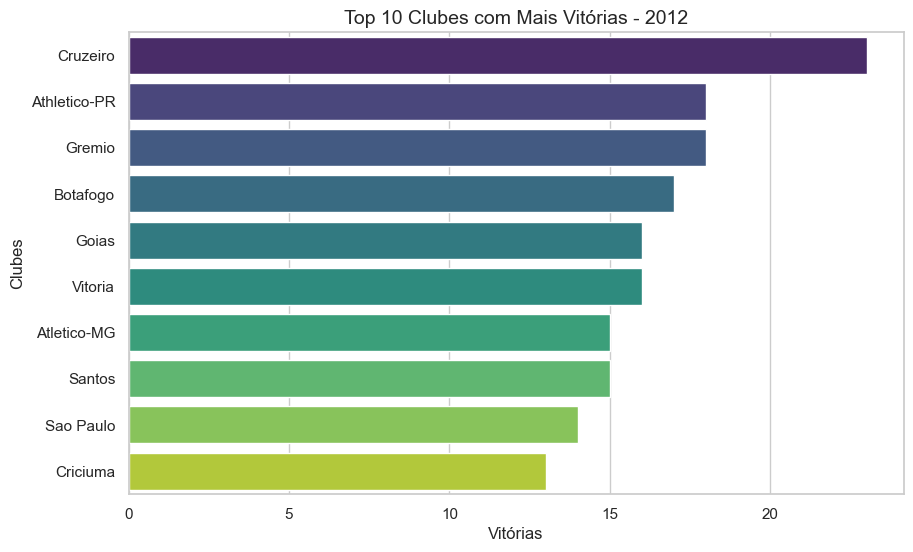

In [18]:
# Se desejar comparar apenas um ano específico:
ano_escolhido = 2012
df_ano = df[df["Ano"] == ano_escolhido]

top_vitorias = df_ano.nlargest(10, "Vitorias")

plt.figure(figsize=(10,6))
sns.barplot(data=top_vitorias, x="Vitorias", y="Clubes", palette="viridis")
plt.title(f"Top 10 Clubes com Mais Vitórias - {ano_escolhido}", fontsize=14)
plt.xlabel("Vitórias")
plt.ylabel("Clubes")
plt.show()

### Clubes com melhor saldo de gols

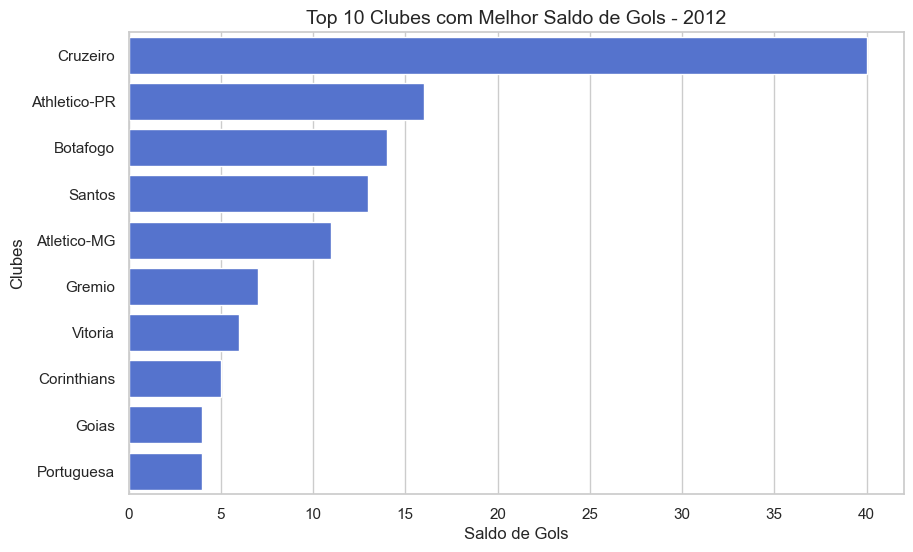

In [19]:
top_saldo = df_ano.sort_values("Saldo", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_saldo, x="Saldo", y="Clubes", color="royalblue")
plt.title(f"Top 10 Clubes com Melhor Saldo de Gols - {ano_escolhido}", fontsize=14)
plt.xlabel("Saldo de Gols")
plt.ylabel("Clubes")
plt.show()

### Clubes com maior valor de elenco

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\406868246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ano["Valor_total_milhoes"] = df_ano["Valor_total"] / 1e6


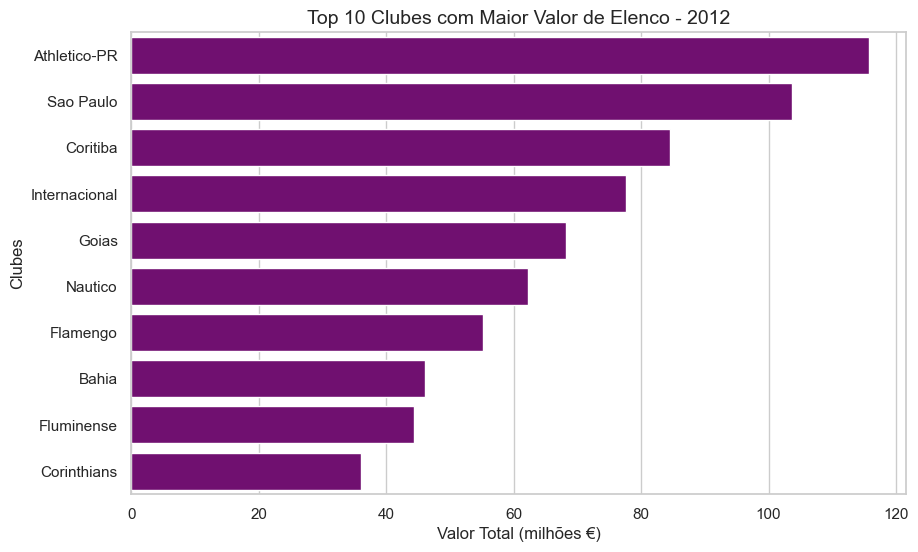

In [20]:
# (Dividindo em milhões para facilitar a leitura)
df_ano["Valor_total_milhoes"] = df_ano["Valor_total"] / 1e6

top_valor = df_ano.sort_values("Valor_total_milhoes", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_valor, x="Valor_total_milhoes", y="Clubes", color="purple")
plt.title(f"Top 10 Clubes com Maior Valor de Elenco - {ano_escolhido}", fontsize=14)
plt.xlabel("Valor Total (milhões €)")
plt.ylabel("Clubes")
plt.show()

### Clubes com mais estrangeiros

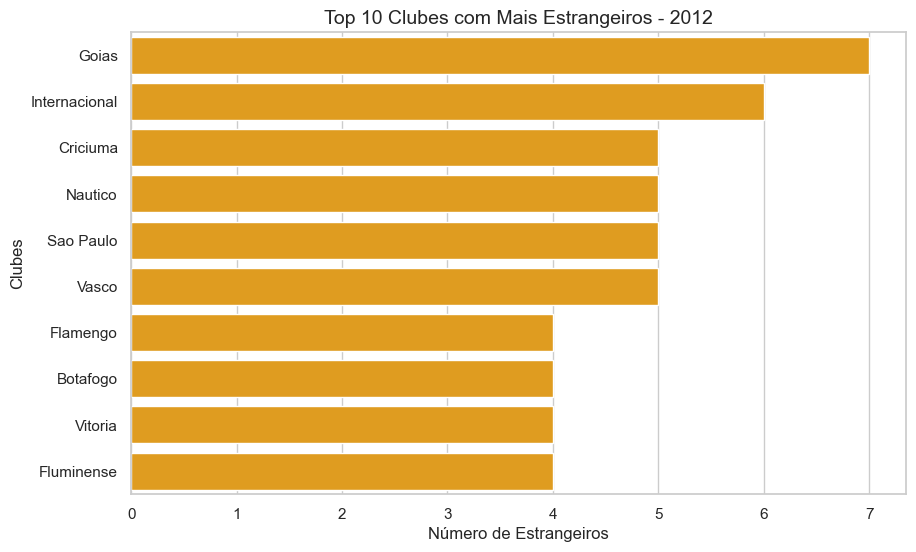

In [21]:
top_estrangeiros = df_ano.sort_values("Estrangeiros", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_estrangeiros, x="Estrangeiros", y="Clubes", color="orange")
plt.title(f"Top 10 Clubes com Mais Estrangeiros - {ano_escolhido}", fontsize=14)
plt.xlabel("Número de Estrangeiros")
plt.ylabel("Clubes")
plt.show()

## 3. Análises Temporais (Evolução ao Longo dos Anos)

| Objetivo                                            | Colunas               | Tipo de Gráfico                  | Sugestão                                                       |
| --------------------------------------------------- | --------------------- | -------------------------------- | -------------------------------------------------------------- |
| Evolução do valor total do elenco ao longo dos anos | `Ano`, `Valor_total`  | Linha (`sns.lineplot`)           | Pode ser média por ano ou de clubes específicos                |
| Evolução da idade média                             | `Ano`, `Idade_Media`  | Linha                            | Mostrar se os elencos estão ficando mais jovens ou experientes |
| Evolução do número de estrangeiros                  | `Ano`, `Estrangeiros` | Linha ou área                    | Ver tendência de internacionalização                           |
| Variação da posição de um clube específico          | `Ano`, `Pos.`         | Linha invertida (menor é melhor) | Ideal para analisar desempenho ao longo do tempo               |


### Evolução do valor total do elenco ao longo dos anos

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\3398864550.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Ano", y="Valor_total_milhoes", estimator="mean", ci=None, marker="o")


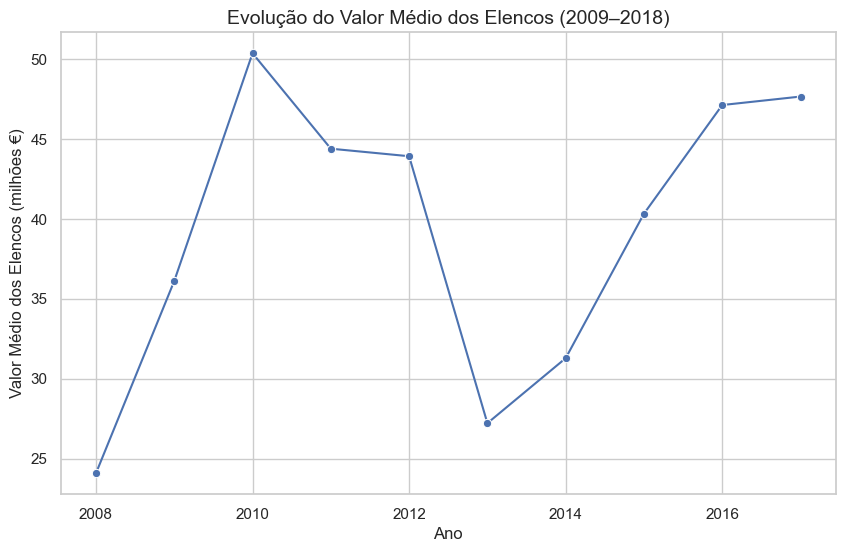

In [24]:
# Cria uma coluna em milhões de euros para facilitar a leitura
df["Valor_total_milhoes"] = df["Valor_total"] / 1e6
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Ano", y="Valor_total_milhoes", estimator="mean", ci=None, marker="o")
plt.title("Evolução do Valor Médio dos Elencos (2009–2018)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Valor Médio dos Elencos (milhões €)")
plt.show()

### Evolução da idade média

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\2289874286.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Ano", y="Idade_Media", estimator="mean", ci=None, marker="o", color="green")


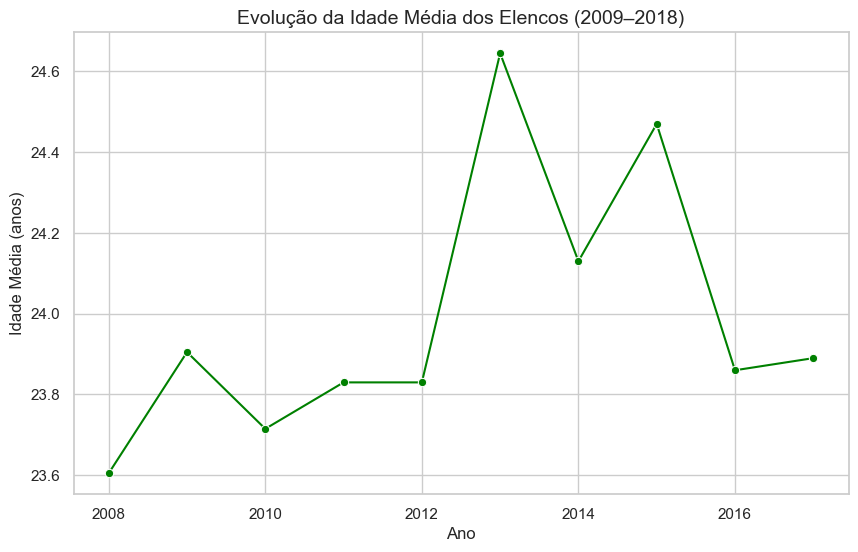

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Ano", y="Idade_Media", estimator="mean", ci=None, marker="o", color="green")
plt.title("Evolução da Idade Média dos Elencos (2009–2018)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Idade Média (anos)")
plt.show()


### Evolução do número de estrangeiros

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\3488439175.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Ano", y="Estrangeiros", estimator="mean", ci=None, marker="o", color="orange")


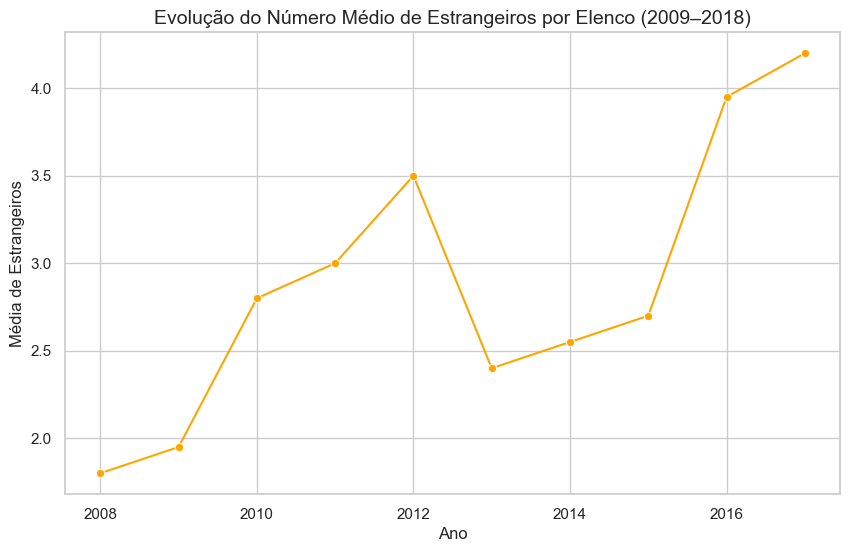

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Ano", y="Estrangeiros", estimator="mean", ci=None, marker="o", color="orange")
plt.title("Evolução do Número Médio de Estrangeiros por Elenco (2009–2018)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Média de Estrangeiros")
plt.show()

### Variação da posição de um clube específico

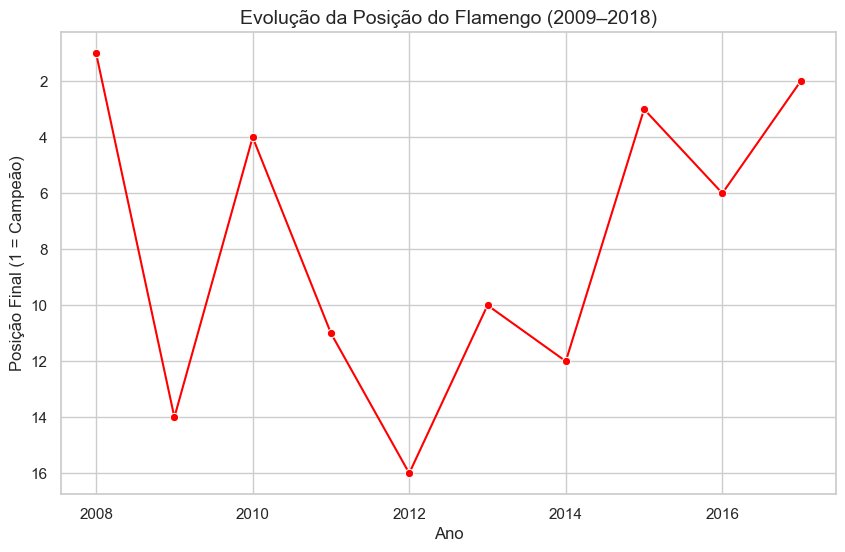

In [27]:
clube_escolhido = "Flamengo"  # altere aqui para qualquer clube do dataset
df_clube = df[df["Clubes"].str.lower() == clube_escolhido.lower()]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_clube, x="Ano", y="Pos.", marker="o", color="red")
plt.title(f"Evolução da Posição do {clube_escolhido} (2009–2018)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Posição Final (1 = Campeão)")
plt.gca().invert_yaxis()  # menor posição = melhor
plt.show()


## 4. Relações Entre Variáveis

| Objetivo                                      | Colunas               | Tipo de Gráfico                          | Sugestão                                                  |
| --------------------------------------------- | --------------------- | ---------------------------------------- | --------------------------------------------------------- |
| Relação entre valor do elenco e posição final | `Valor_total`, `Pos.` | Dispersão (`sns.scatterplot`)            | Testar se times mais caros terminam melhor                |
| Relação entre vitórias e saldo de gols        | `Vitorias`, `Saldo`   | Dispersão                                | Espera-se uma correlação positiva                         |
| Relação entre idade média e desempenho        | `Idade_Media`, `Pos.` | Dispersão                                | Ver se elencos mais experientes performam melhor          |
| Correlação entre variáveis numéricas          | Todas numéricas       | Mapa de calor (`sns.heatmap(df.corr())`) | Mostra associações entre vitórias, derrotas, valores etc. |


In [30]:
df["Valor_total_milhoes"] = df["Valor_total"] / 1e6
df["Media_Valor_milhoes"] = df["Media_Valor"] / 1e6

### Relação entre valor do elenco e posição final

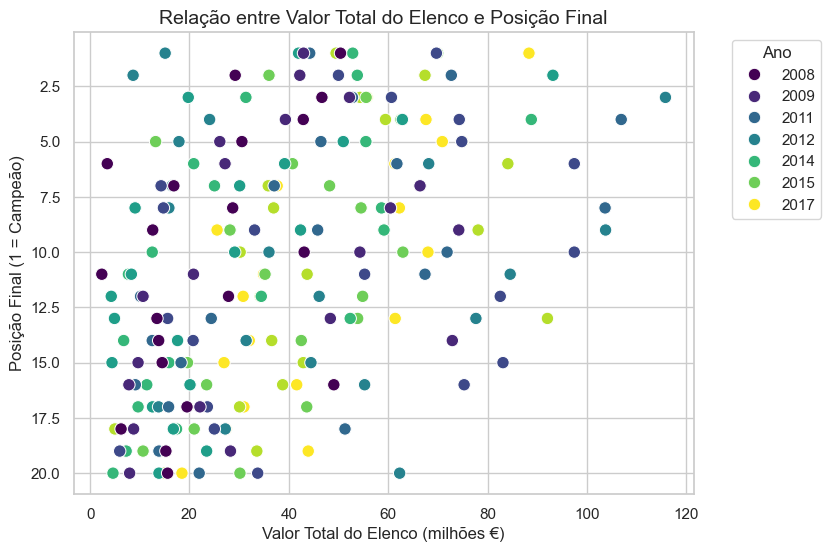

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Valor_total_milhoes", y="Pos.", hue="Ano", palette="viridis", s=80)
plt.title("Relação entre Valor Total do Elenco e Posição Final", fontsize=14)
plt.xlabel("Valor Total do Elenco (milhões €)")
plt.ylabel("Posição Final (1 = Campeão)")
plt.gca().invert_yaxis()  # posição 1 é melhor
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Relação entre vitórias e saldo de gols

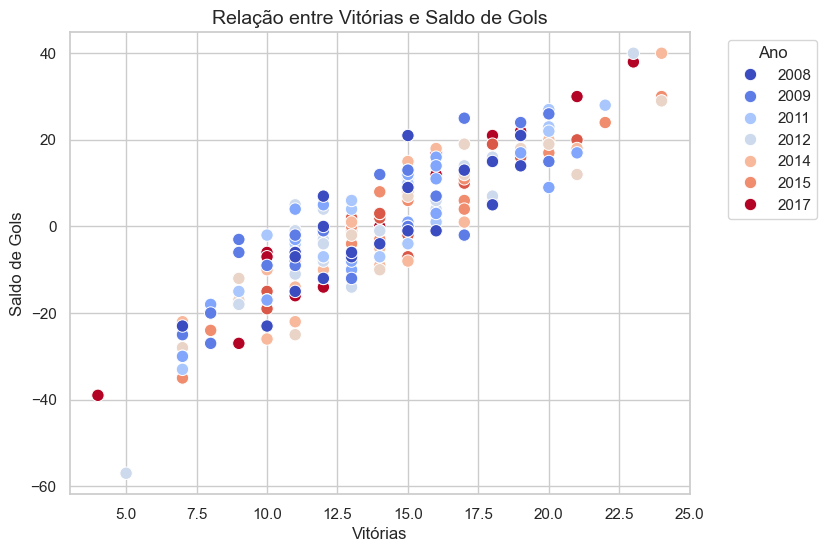

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Vitorias", y="Saldo", hue="Ano", palette="coolwarm", s=80)
plt.title("Relação entre Vitórias e Saldo de Gols", fontsize=14)
plt.xlabel("Vitórias")
plt.ylabel("Saldo de Gols")
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Relação entre idade média e desempenho

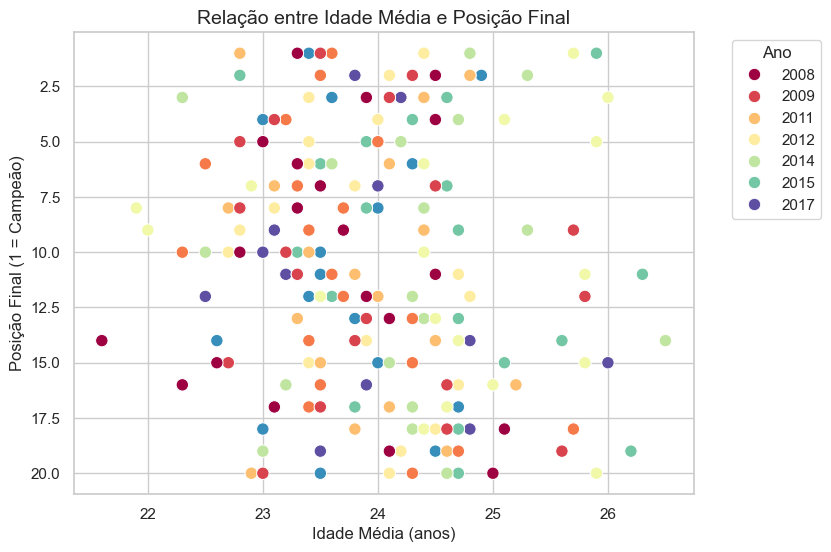

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Idade_Media", y="Pos.", hue="Ano", palette="Spectral", s=80)
plt.title("Relação entre Idade Média e Posição Final", fontsize=14)
plt.xlabel("Idade Média (anos)")
plt.ylabel("Posição Final (1 = Campeão)")
plt.gca().invert_yaxis()
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Correlação entre variáveis numéricas

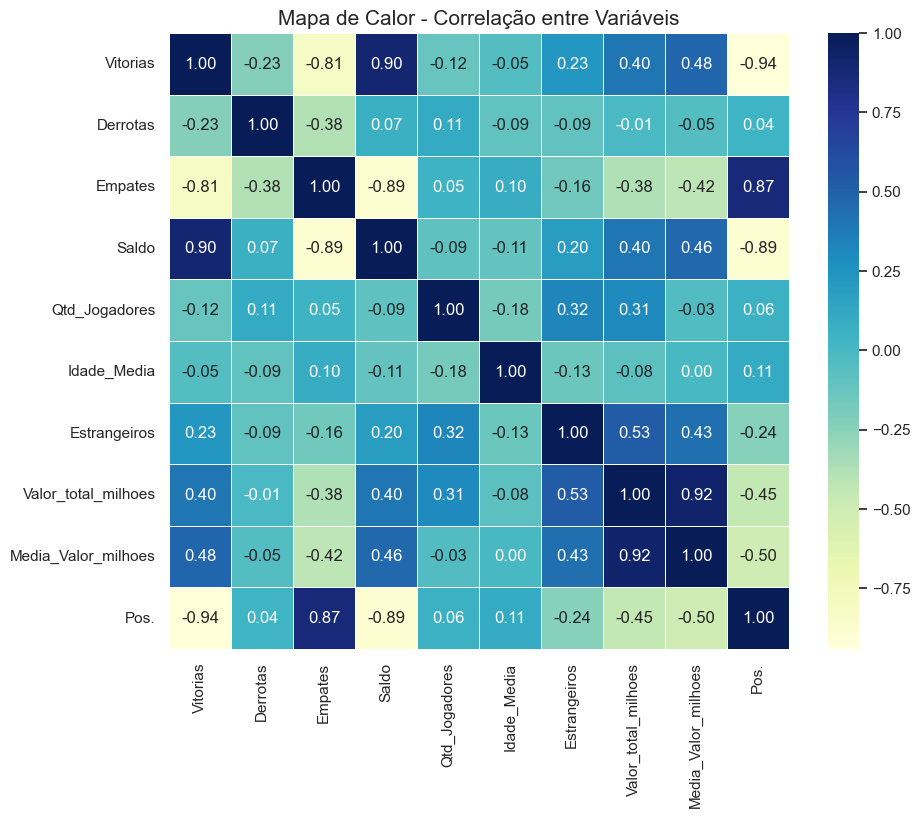

In [34]:
cols_numericas = ["Vitorias", "Derrotas", "Empates", "Saldo", "Qtd_Jogadores",
                  "Idade_Media", "Estrangeiros", "Valor_total_milhoes", "Media_Valor_milhoes", "Pos."]

corr = df[cols_numericas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title("Mapa de Calor - Correlação entre Variáveis", fontsize=15)
plt.show()

## 5. Rankings e Destaques

| Objetivo                                            | Colunas                  | Tipo de Gráfico  | Sugestão                                                 |
| --------------------------------------------------- | ------------------------ | ---------------- | -------------------------------------------------------- |
| Top 5 clubes com mais pontos (3×vitórias + empates) | `Vitorias`, `Empates`    | Barras           | Calcular coluna `Pontos = 3*Vitorias + Empates`          |
| Clubes com melhor saldo médio por ano               | `Saldo`, `Ano`           | Barras agrupadas | Comparar desempenho em diferentes temporadas             |
| Clubes com maior média de estrangeiros              | `Estrangeiros`, `Clubes` | Barras           | Ver clubes com mais jogadores estrangeiros por temporada |


### Top 5 clubes com mais pontos (3×vitórias + empates)

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\1163710051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_pos, x="Pos.", y="Clubes", palette="viridis", orient="h")


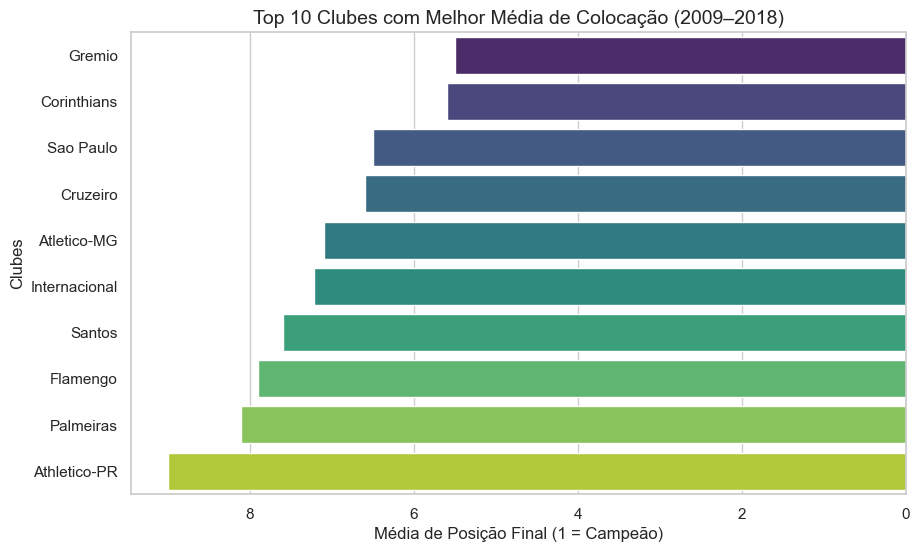

In [35]:
ranking_pos = (
    df.groupby("Clubes")["Pos."]
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=ranking_pos, x="Pos.", y="Clubes", palette="viridis", orient="h")
plt.title("Top 10 Clubes com Melhor Média de Colocação (2009–2018)", fontsize=14)
plt.xlabel("Média de Posição Final (1 = Campeão)")
plt.ylabel("Clubes")
plt.gca().invert_xaxis()
plt.show()

### Clubes com melhor saldo médio por ano

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\1772074674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_saldo, x="Saldo", y="Clubes", palette="coolwarm", orient="h")


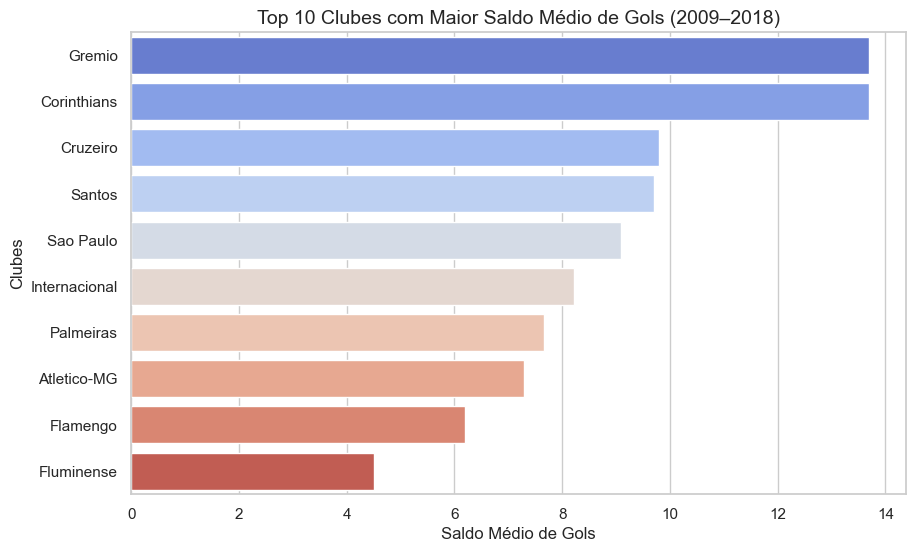

In [38]:
ranking_saldo = (
    df.groupby("Clubes")["Saldo"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=ranking_saldo, x="Saldo", y="Clubes", palette="coolwarm", orient="h")
plt.title("Top 10 Clubes com Maior Saldo Médio de Gols (2009–2018)", fontsize=14)
plt.xlabel("Saldo Médio de Gols")
plt.ylabel("Clubes")
plt.show()

### Clubes com maior média de estrangeiros

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_9492\1243109045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_estrangeiros, x="Estrangeiros", y="Clubes", palette="flare", orient="h")


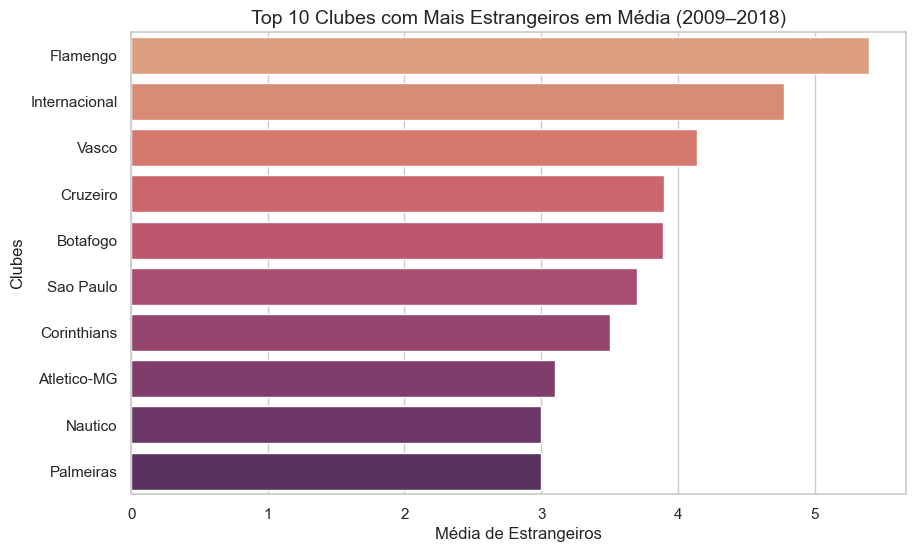

In [37]:
ranking_estrangeiros = (
    df.groupby("Clubes")["Estrangeiros"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=ranking_estrangeiros, x="Estrangeiros", y="Clubes", palette="flare", orient="h")
plt.title("Top 10 Clubes com Mais Estrangeiros em Média (2009–2018)", fontsize=14)
plt.xlabel("Média de Estrangeiros")
plt.ylabel("Clubes")
plt.show()

## 6. Extras (para deixar o dashboard bonito)

| Ideia                                                                                                          | Tipo                                                 |
| -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- |
| **Treemap** mostrando proporção do valor de mercado por clube em determinado ano                               | `plotly.express.treemap`                             |
| **Gráfico de radar (radar chart)** comparando desempenho de 2–3 clubes (vitórias, derrotas, saldo, valor etc.) | `plotly.graph_objects`                               |
| **Mapa de calor de posições** (linha = clube, coluna = ano, cor = posição)                                     | `sns.heatmap(pivot_table)`                           |
| **Gráfico de dispersão animado** mostrando evolução do valor × posição ao longo dos anos                       | `plotly.express.scatter` com `animation_frame='Ano'` |


### **Treemap** mostrando proporção do valor de mercado por clube em determinado ano

In [42]:
ano_ref = 2012  # escolha o ano de referência
df_ano = df[df['Ano'] == ano_ref]

fig = px.treemap(df_ano,
                 path=['Clubes'],
                 values='Valor_total',
                 title=f'Proporção do Valor de Mercado por Clube ({ano_ref})',
                 color='Pos.',
                 color_continuous_scale='Viridis',
                 hover_data=['Vitorias', 'Derrotas', 'Empates'])
fig.show()

### **Gráfico de radar (radar chart)** comparando desempenho de 2–3 clubes (vitórias, derrotas, saldo, valor etc.)

In [44]:
clubes_comp = ['Flamengo', 'Palmeiras', 'Corinthians']
ano_comp = 2018

df_radar = df[df['Ano'].eq(ano_comp) & df['Clubes'].isin(clubes_comp)]
categorias = ['Vitorias', 'Derrotas', 'Empates', 'Saldo', 'Valor_total']

fig = go.Figure()

for clube in clubes_comp:
    valores = df_radar[df_radar['Clubes'] == clube][categorias].values.flatten().tolist()
    valores += valores[:1]  # fecha o polígono
    fig.add_trace(go.Scatterpolar(
        r=valores,
        theta=categorias + [categorias[0]],
        fill='toself',
        name=clube
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title=f'Comparativo de Desempenho ({ano_comp})',
    showlegend=True
)
fig.show()

### **Mapa de calor de posições** (linha = clube, coluna = ano, cor = posição)

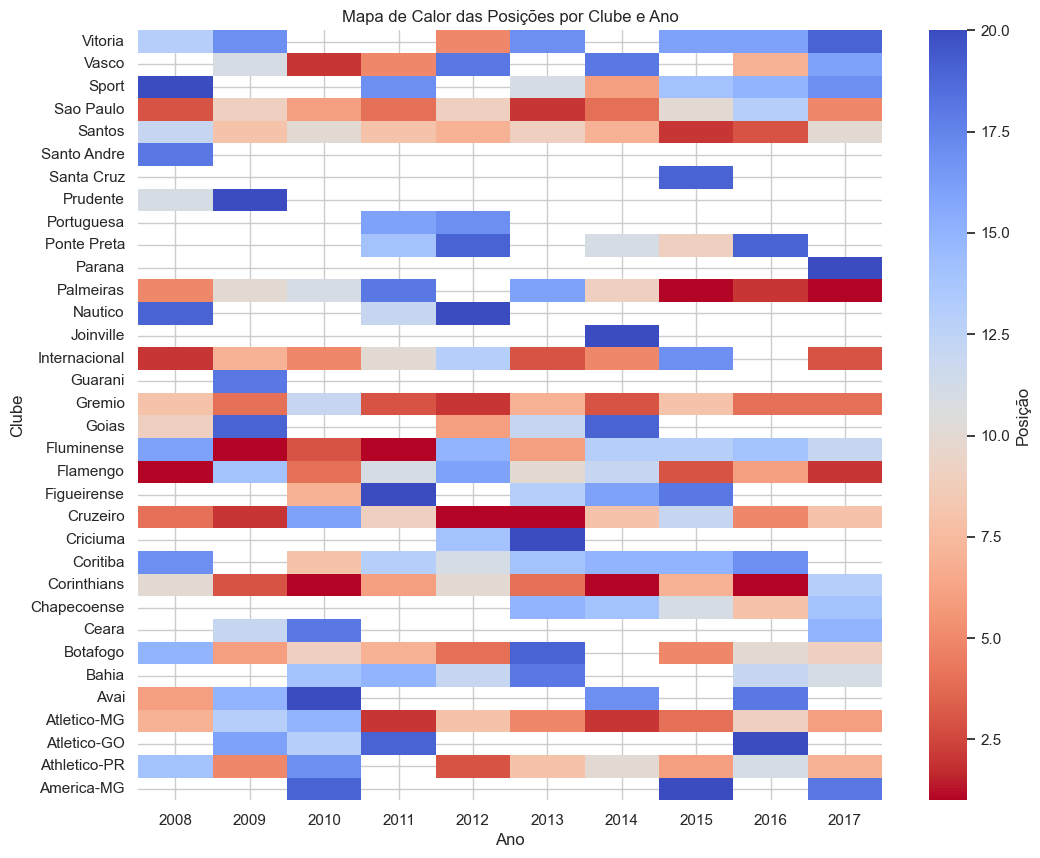

In [47]:
pivot = df.pivot_table(index='Clubes', columns='Ano', values='Pos.')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap='coolwarm_r', annot=False, cbar_kws={'label': 'Posição'})
plt.title('Mapa de Calor das Posições por Clube e Ano')
plt.xlabel('Ano')
plt.ylabel('Clube')
plt.gca().invert_yaxis()
plt.show()



### **Gráfico de dispersão animado** mostrando evolução do valor × posição ao longo dos anos 

In [46]:
# 4️⃣ Gráfico de dispersão animado — valor × posição ao longo dos anos
fig = px.scatter(df,
                 x='Valor_total',
                 y='Pos.',
                 animation_frame='Ano',
                 color='Clubes',
                 size='Estrangeiros',
                 hover_name='Clubes',
                 title='Evolução do Valor de Mercado x Posição ao Longo dos Anos',
                 range_y=[20, 0])  # inverte o eixo Y (1 = melhor posição)
fig.show()